In [1]:
#Install Libraries
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install langdetect
!pip install twython

     |████████████████████████████████| 10.1 MB 5.1 MB/s 
  Created wheel for pycountry: filename=pycountry-22.1.10-py2.py3-none-any.whl size=10595784 sha256=f4cd02d526a0e4cb6fd42b7508e090318335e87d7a1adaf1f1e77d125371283b
  Stored in directory: /root/.cache/pip/wheels/f7/8f/9c/b070d7376caf2beb0685bf72578106b2fd57019ed57d84f126
Successfully built pycountry
     |████████████████████████████████| 981 kB 5.2 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=86db11ffdbb80b6e7d5270b4f15a9b2aa53c5939e151e4102a26bf63800a506d
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [2]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
!pip install pycountry
import re
import string
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [3]:
# Authentication
api_key = "ARV19ExtBrl6OXwtTNQLZJvxF"
api_secret = "0CFxLGwumTvrg5Qn66RMOGxrdBak6vWkvPD2wy6TYvmj8O88KU"
access_token = "1008757557526188032-OxVcoMs5hADTNA4AQx4HThfw9AJue6"
access_token_secret = "gPwVkmaPkcSNRAodst4QRX772SvJEWrmH97neA6XCB0XT"

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [4]:
#Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)
keyword = input("Please enter keyword or hashtag to search: ")
no_of_tweet = int(input ("Please enter how many tweets to analyze: "))
tweets = tweepy.Cursor(api.search, q=keyword).items(no_of_tweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

Please enter keyword or hashtag to search: UkraineRussianWar
Please enter how many tweets to analyze: 5000


In [5]:
for tweet in tweets:
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score["neg"]
    neu = score["neu"]
    pos = score["pos"]
    comp = score["compound"]
    polarity += analysis.sentiment.polarity
 
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, no_of_tweet)
negative = percentage(negative, no_of_tweet)
neutral = percentage(neutral, no_of_tweet)
polarity = percentage(polarity, no_of_tweet)
positive = format(positive, ".1f")
negative = format(negative, ".1f")
neutral = format(neutral, ".1f")


Rate limit reached. Sleeping for: 820


In [6]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  5000
positive number:  1013
negative number:  1609
neutral number:  2378


In [7]:
tweet_list

,0
0,RT @marcowenjones: Thread 1/ This is a thread ...
1,RT @Qua_Agatha: “Cittadini e strutture #UE coi...
2,Russia will stop deliveries of rocket engines ...
3,RT @VtvGujarati: ભારતીય વિદ્યાર્થીઓને યૂક્રેને...
4,RT @marcowenjones: Thread 1/ This is a thread ...
...,...
4995,"Nur mal so nebenbei an alle, die gerade für #U..."
4996,RT @HemantK25038314: #RussiaUkraine\n#Ukriane ...
4997,RT @real_yudee: United States of America are k...
4998,RT @Hayek_was_right: Did someone say energy cr...


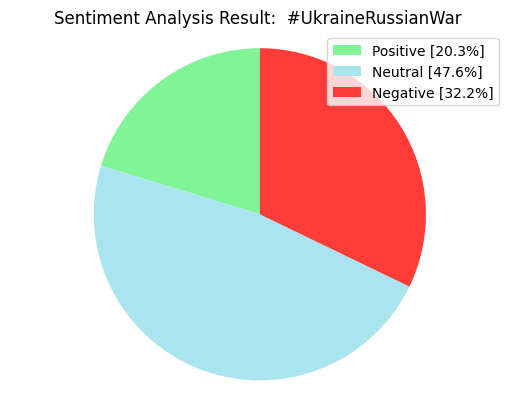

In [30]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ["#81F495","#A9E4EF","#FF3C38"]
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result:  #"+keyword+"" )
plt.axis('equal')
plt.show()

In [31]:
tweet_list.drop_duplicates(inplace = True)

# **Getting Text Values**

In [32]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @marcowenjones: Thread 1/ This is a thread ...,RT @marcowenjones: Thread 1/ This is a thread ...
1,RT @Qua_Agatha: “Cittadini e strutture #UE coi...,RT @Qua_Agatha: “Cittadini e strutture #UE coi...
2,Russia will stop deliveries of rocket engines ...,Russia will stop deliveries of rocket engines ...
3,RT @VtvGujarati: ભારતીય વિદ્યાર્થીઓને યૂક્રેને...,RT @VtvGujarati: ભારતીય વિદ્યાર્થીઓને યૂક્રેને...
5,RT @MinhazMerchant: In all this talk of nuclea...,RT @MinhazMerchant: In all this talk of nuclea...
...,...,...
4993,@svtnyheter Påminner mycket om Nazi Tysklands ...,@svtnyheter Påminner mycket om Nazi Tysklands ...
4994,1 out of 6 people on earth will suffer the con...,1 out of 6 people on earth will suffer the con...
4995,"Nur mal so nebenbei an alle, die gerade für #U...","Nur mal so nebenbei an alle, die gerade für #U..."
4998,RT @Hayek_was_right: Did someone say energy cr...,RT @Hayek_was_right: Did someone say energy cr...


In [33]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(15)

,0,text
0,RT @marcowenjones: Thread 1/ This is a thread ...,thread 1 this is a thread on pro russian pro...
1,RT @Qua_Agatha: “Cittadini e strutture #UE coi...,cittadini e strutture ue coinvolti in forni...
2,Russia will stop deliveries of rocket engines ...,russia will stop deliveries of rocket engines ...
3,RT @VtvGujarati: ભારતીય વિદ્યાર્થીઓને યૂક્રેને...,...
5,RT @MinhazMerchant: In all this talk of nuclea...,in all this talk of nuclear war remember onl...
6,RT @telematin: #Ukraine : 1 million de réfugié...,ukraine 1 million de r fugi s en une semai...
7,"🇵🇸 #Palestine | ""Occupation Forces Attack Jeru...",palestine occupation forces attack jeru...
8,Some 498 Russian servicemen have been killed a...,some 498 russian servicemen have been killed a...
9,"On Tiktok, a Catholic Sister Goes Viral After ...",on tiktok a catholic sister goes viral after ...
10,TRUE.\nYou need. But you do almost nothing.\n\...,true you need but you do almost nothing u...


In [34]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @marcowenjones: Thread 1/ This is a thread ...,thread 1 this is a thread on pro russian pro...,-0.050000,0.050000,negative,0.111,0.889,0.000,-0.2500
1,RT @Qua_Agatha: “Cittadini e strutture #UE coi...,cittadini e strutture ue coinvolti in forni...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
2,Russia will stop deliveries of rocket engines ...,russia will stop deliveries of rocket engines ...,0.000000,0.000000,negative,0.145,0.855,0.000,-0.2960
3,RT @VtvGujarati: ભારતીય વિદ્યાર્થીઓને યૂક્રેને...,...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
5,RT @MinhazMerchant: In all this talk of nuclea...,in all this talk of nuclear war remember onl...,0.000000,1.000000,negative,0.379,0.621,0.000,-0.9217
6,RT @telematin: #Ukraine : 1 million de réfugié...,ukraine 1 million de r fugi s en une semai...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
7,"🇵🇸 #Palestine | ""Occupation Forces Attack Jeru...",palestine occupation forces attack jeru...,0.100000,0.200000,negative,0.237,0.763,0.000,-0.4767
8,Some 498 Russian servicemen have been killed a...,some 498 russian servicemen have been killed a...,-0.033333,0.133333,negative,0.322,0.678,0.000,-0.8225
9,"On Tiktok, a Catholic Sister Goes Viral After ...",on tiktok a catholic sister goes viral after ...,0.000000,0.100000,negative,0.091,0.909,0.000,-0.1779
10,TRUE.\nYou need. But you do almost nothing.\n\...,true you need but you do almost nothing u...,0.350000,0.650000,positive,0.000,0.863,0.137,0.2263


In [35]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [36]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [41]:
#Count_values for sentiment
pc = count_values_in_column(tw_list,"sentiment")
pc

,Total,Percentage
neutral,1378,52.76
negative,702,26.88
positive,532,20.37


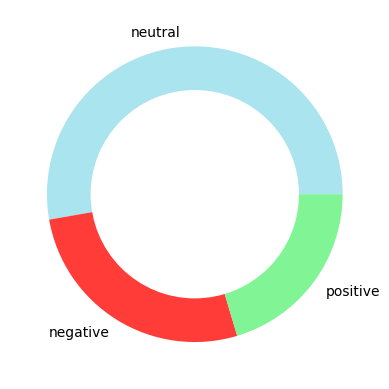

In [45]:
# create data for Pie Chart
piechart = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors = ["#A9E4EF","#FF3C38","#81F495"])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [75]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("/Twitter.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=5000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

# # Generate a word cloud image
# stopwords = set(STOPWORDS)
# mask = np.array(Image.open("/Twitter.png"))
# wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=1000, mask=mask,repeat=False).generate(' '.join(tw_list['text']))
# # create twitter image
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# # store to file
# plt.savefig("twitter.png", format="png")
# plt.show()

Word Cloud Saved Successfully


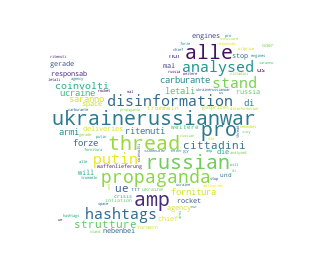

In [76]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


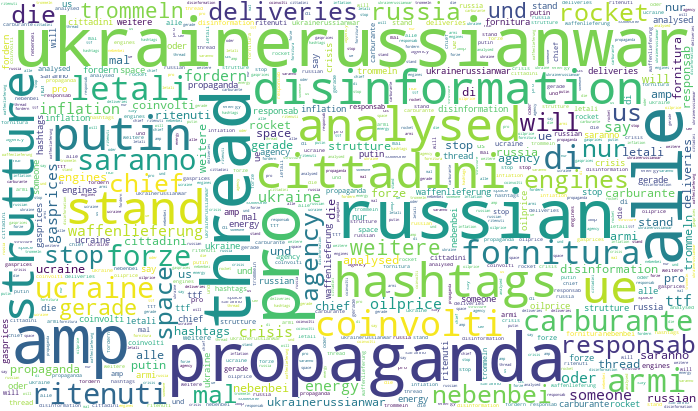

In [79]:
def create_wordcloud(text):
    mask = np.array(Image.open("/cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=5000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


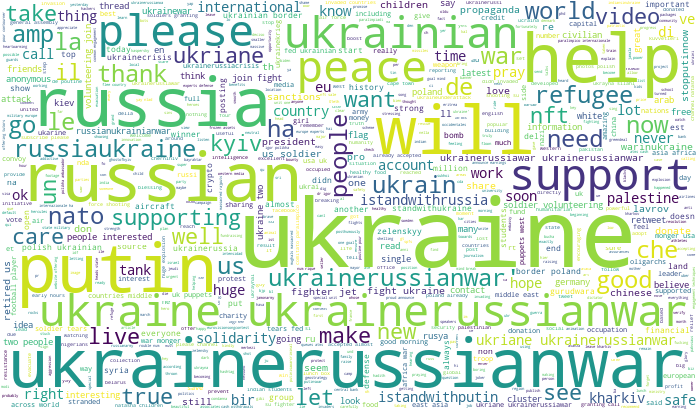

In [80]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


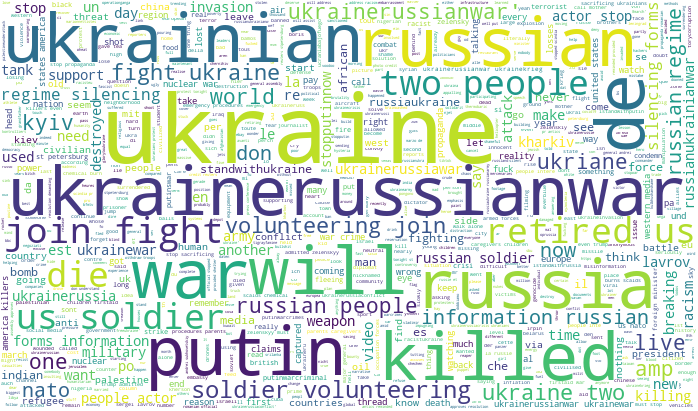

In [81]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


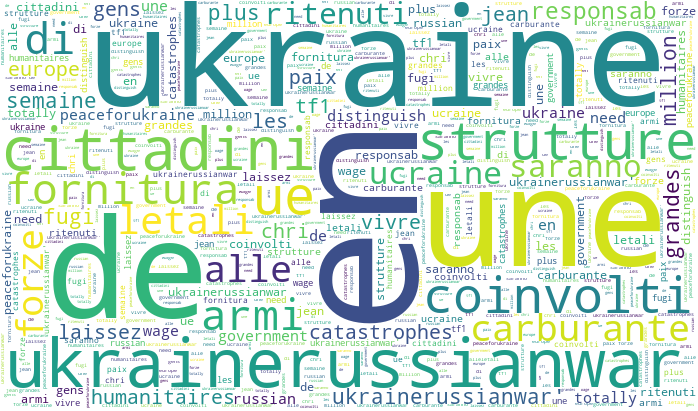

In [82]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)